In [1]:
def edge_detect_ero(i):
    import numpy as np
    from scipy import ndimage
    ero  = ndimage.binary_erosion(i,iterations=1).astype(i.dtype)
    edge = i -ero
    edge[edge==0]=np.nan
    return edge

def edge_detect_first(i):
    import numpy as np
    from scipy import ndimage
    ero =  ndimage.binary_erosion(i, iterations=2).astype(i.dtype)
    dil =  ndimage.binary_dilation(i, iterations=1).astype(i.dtype)
    sep = dil-ero
    sep = ndimage.binary_erosion(sep, iterations=1).astype(sep.dtype)
    sep[sep==0]=np.nan
    return sep


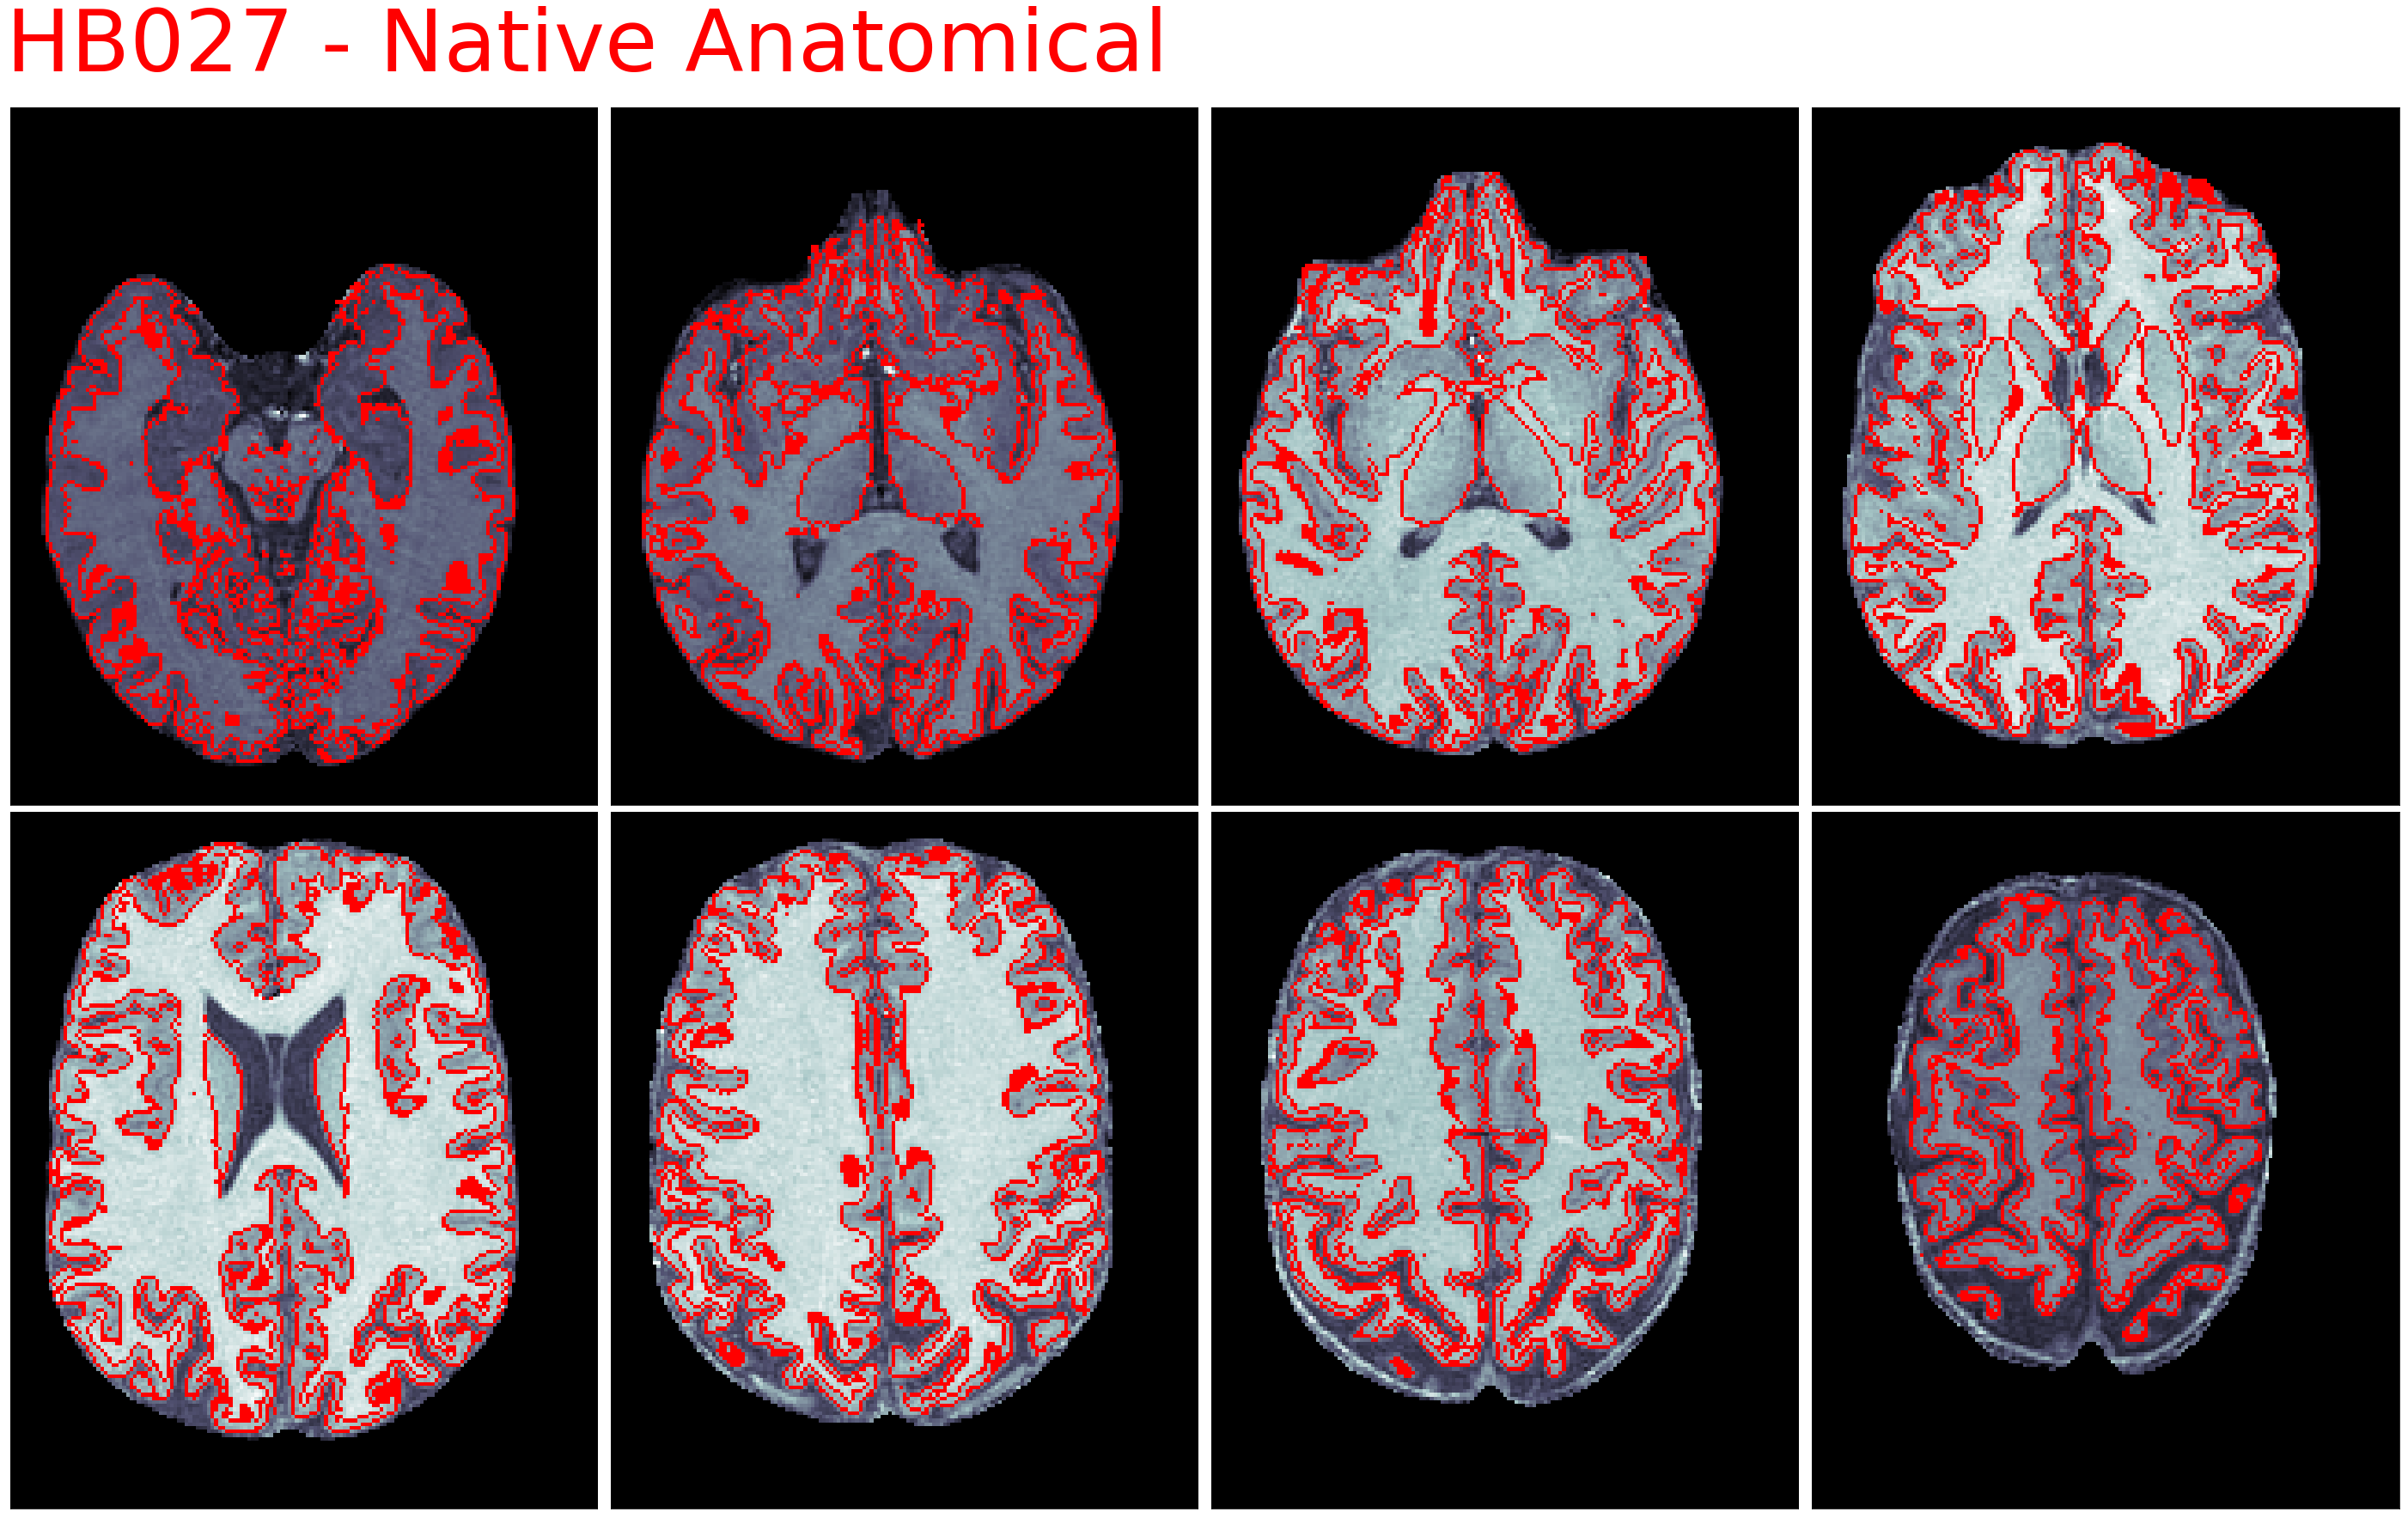

In [106]:
%matplotlib inline
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
def plot_quality(img, tissue, site, caption, cmap = 'red', alpha = 1 ,title = 'x'):

        # grab img data and coords
        img_data = np.rot90(nb.load(img).get_data())
        midpoint = img_data.shape[2] * 0.5
        coords   = [midpoint-30, midpoint-15, midpoint-10, midpoint,
                    midpoint+10, midpoint+20, midpoint+30, midpoint+40]
        
        # plot    
        fig = plt.figure()
        fig.set_size_inches(50, 30)
        gs = gridspec.GridSpec(2, 4)
                
        for i, coord in enumerate(coords):
            if i in xrange(4):
                ax= plt.subplot(gs[0, i])
            else:
                ax = plt.subplot(gs[1, i-4])

            ax.imshow(img_data[:,:,int(coord)], cm.bone)
            ax.axes.get_yaxis().set_visible(False)
            ax.axes.get_xaxis().set_visible(False)
            
            if site  == 'HB':
                ax.set_xlim(20, 180)
                ax.set_ylim(230, 40) 
            elif site  == 'HA':
                ax.set_xlim(20, 180)
                ax.set_ylim(220, 50) 
            elif site  == 'PA':
                ax.set_xlim(20, 180)
                ax.set_ylim(220, 50) 
            elif site  == 'LZ':
                ax.set_xlim(20, 180)
                ax.set_ylim(220, 50) 

            plt.subplots_adjust(wspace=0.01, hspace=0.01)
            #ax.set_aspect('equal')
           
            # grab tissue data 
            if tissue:
                tissue_data = edge_detect_ero(np.rot90(nb.load(tissue).get_data()))
                tissue_data[tissue_data ==0] = np.nan
                ax.imshow(tissue_data[:,:,int(coord)], ListedColormap(cmap))
        
        
        plt.figtext(0.125, 0.9, caption, fontsize = 100, color='r')        
        
        #fig.savefig('/Users/kanaan/Desktop/test.png',bbox_inches='tight')
        
#RAW anatomical quality and segmentation quality 
img    = '/Users/kanaan/SCR/workspace/Tourettome/HB027/ANATOMICAL/ANATOMICAL_BRAIN.nii.gz'        
tissue = '/Users/kanaan/SCR/workspace/Tourettome/HB027/ANATOMICAL/ANATOMICAL_GM.nii.gz'        
site   = 'HB'

plot_quality(img, tissue, site, 'HB027 - Native Anatomical',cmap = 'r', alpha = 0.5 )

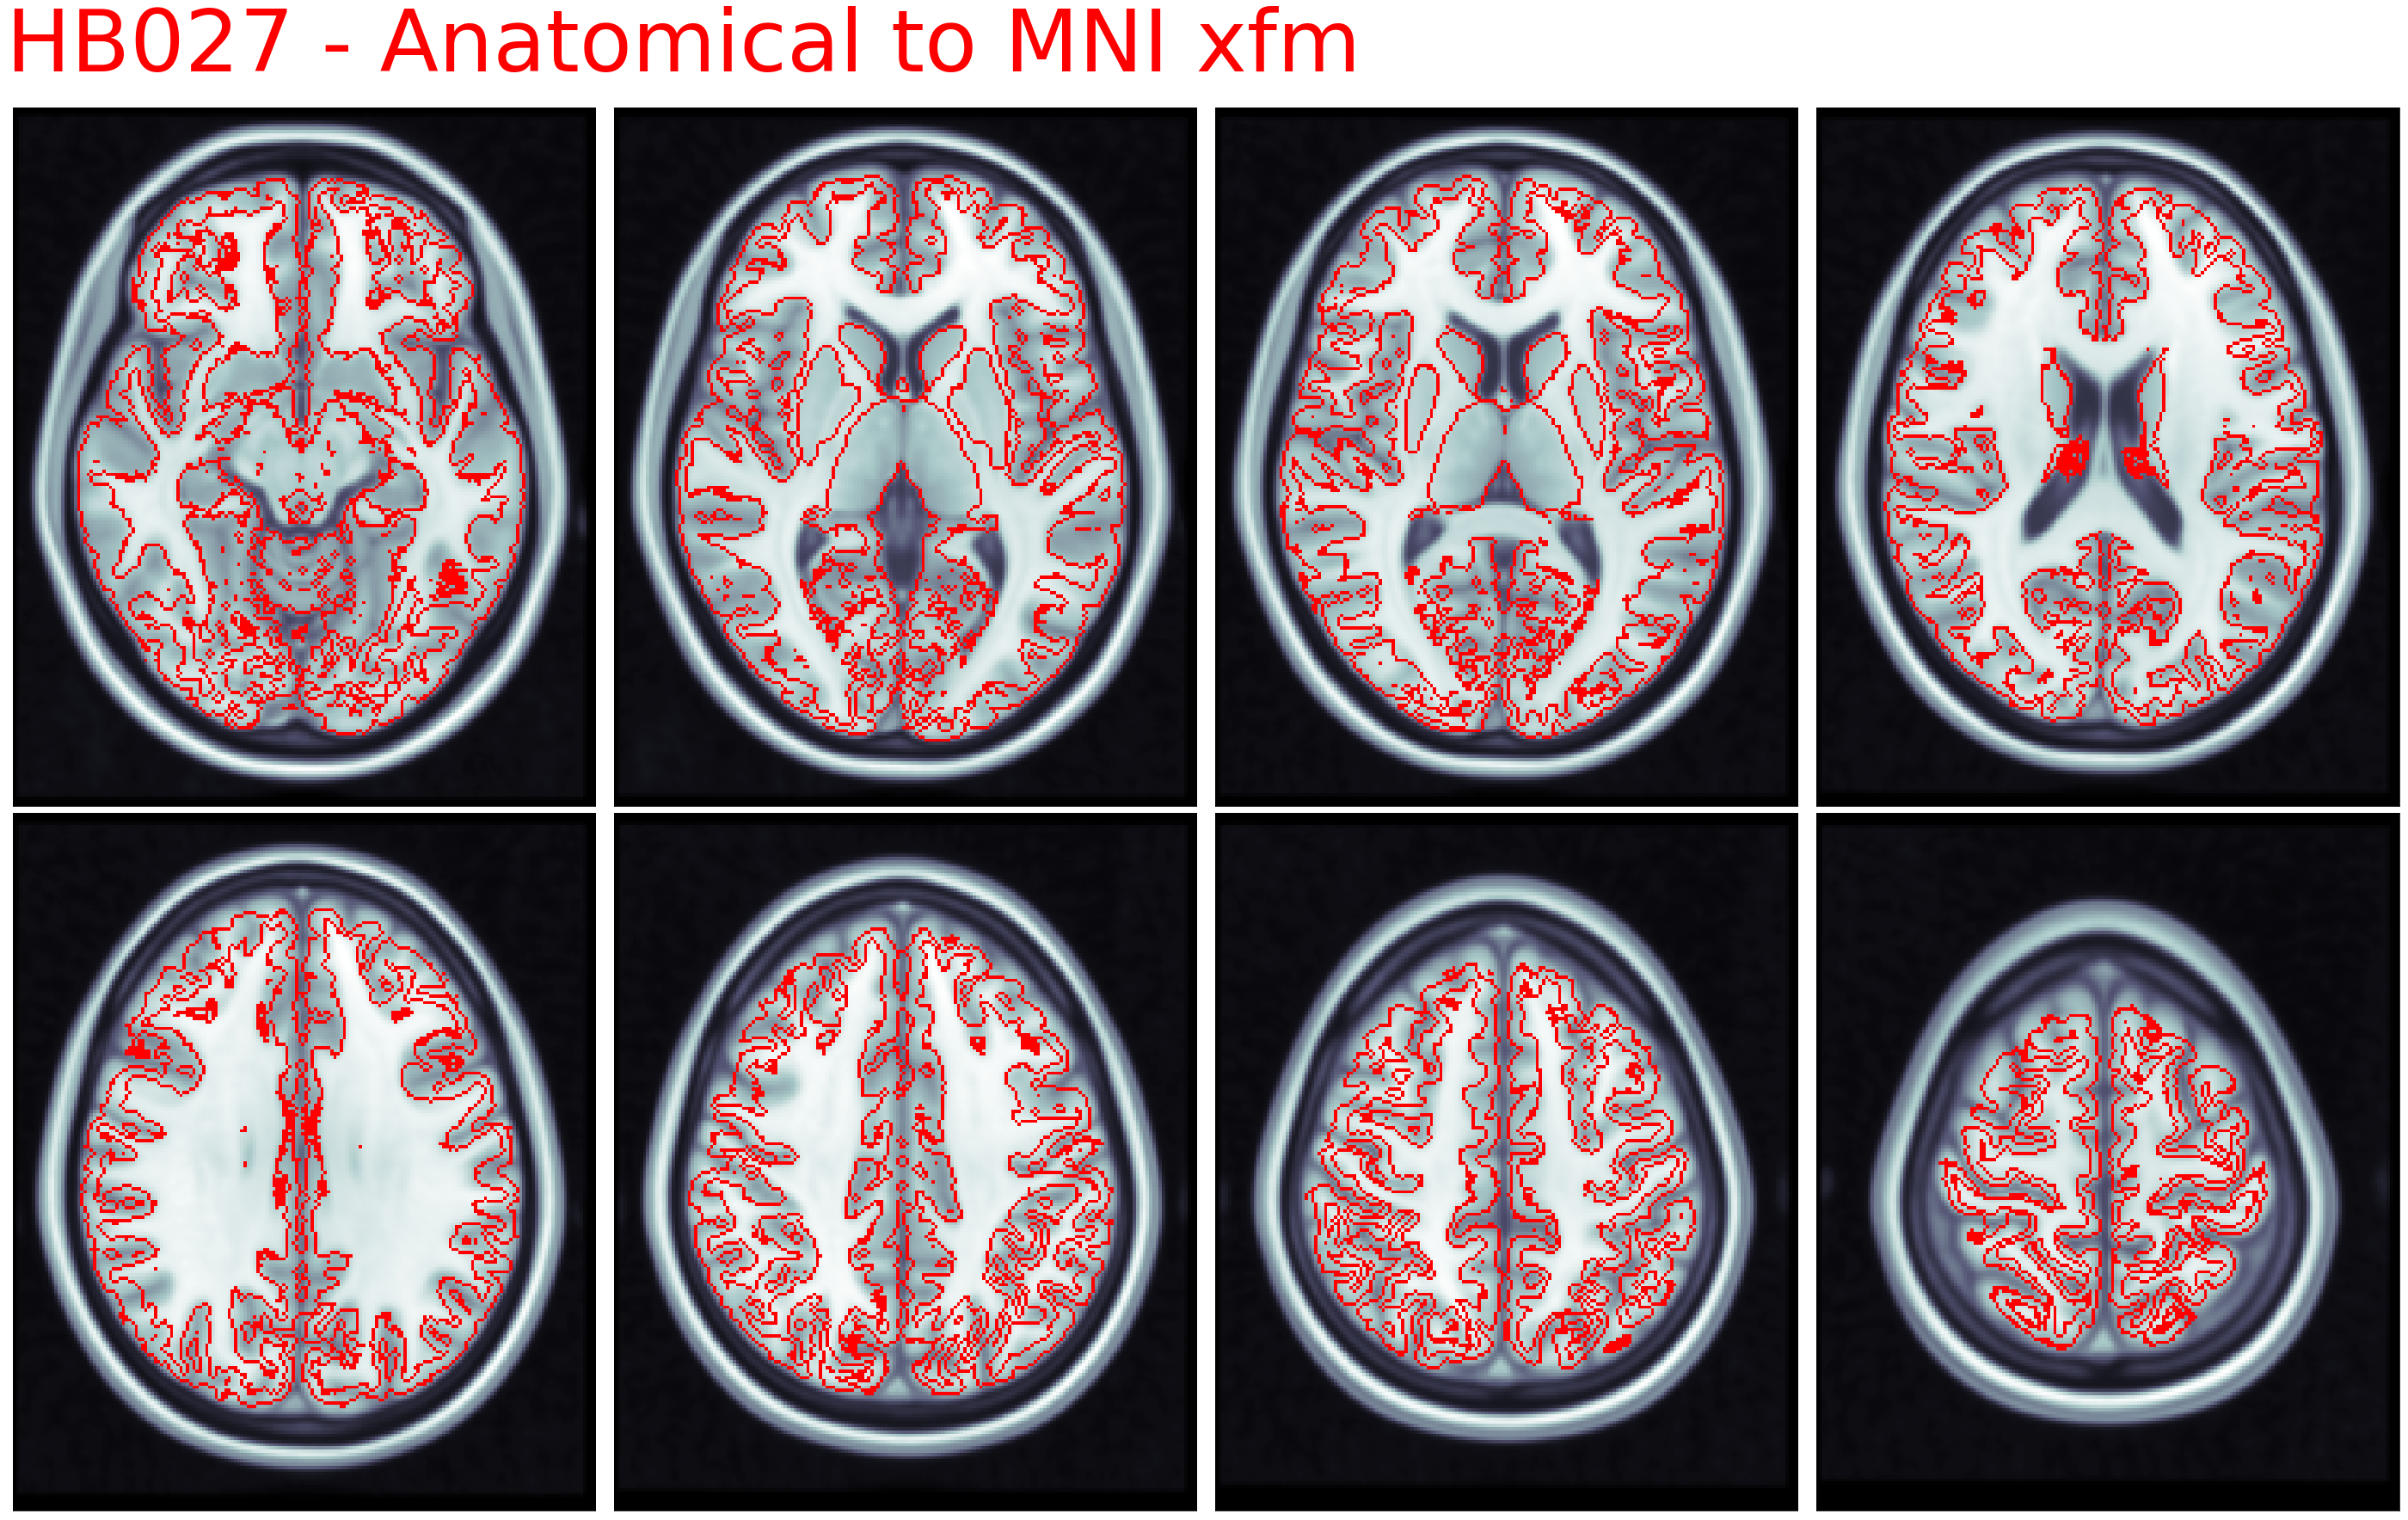

In [105]:
#Anatomical to MNI registration ------ place anat_gm on MNI image 
img    = '/usr/local/fsl/data/standard/MNI152_T1_1mm.nii.gz'
tissue = '/Users/kanaan/SCR/workspace/Tourettome/HB027/REGISTRATION/ANATOMICAL_GM_MNI1mm.nii.gz'   
site   = None

plot_quality(img, tissue, site, 'HB027 - Anatomical to MNI xfm',cmap = 'r', alpha = 0.5 )

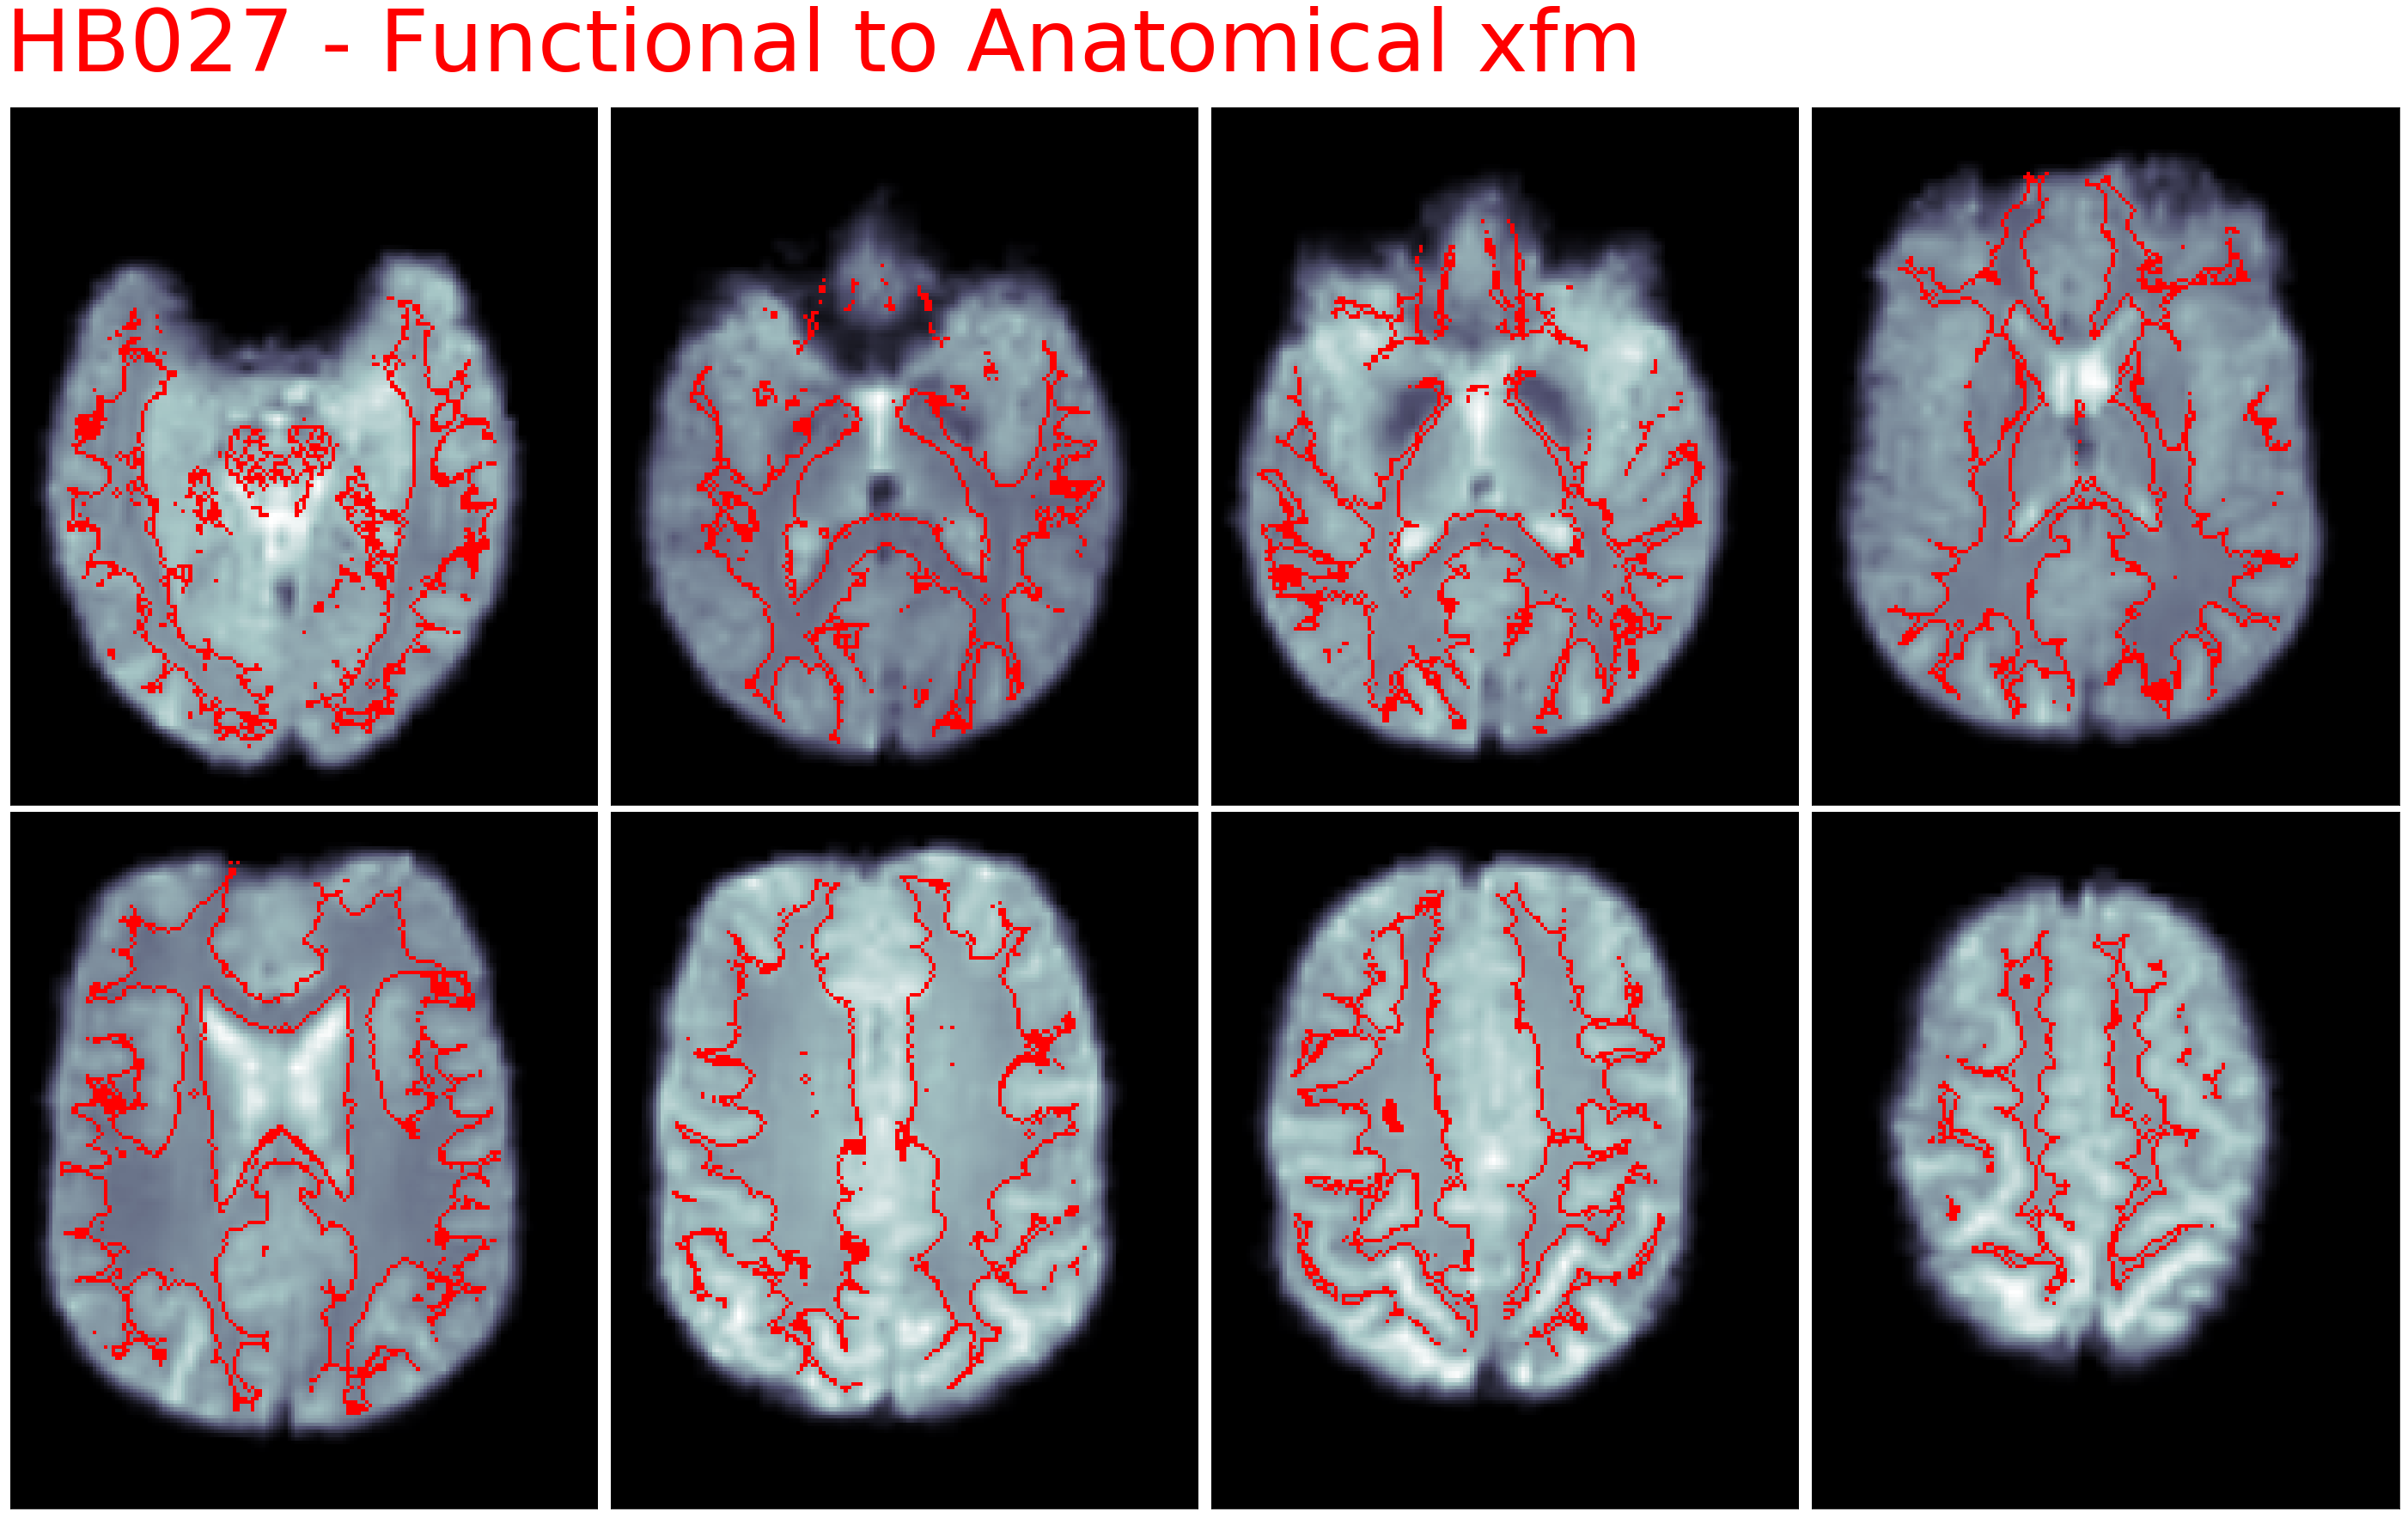

In [110]:
#RAW functional quality 
img    = '/Users/kanaan/SCR/workspace/Tourettome/HB027/REGISTRATION/REST_EDIT_MOCO_BRAIN_MEAN_BBR_ANAT1mm.nii.gz'        
tissue = '/Users/kanaan/SCR/workspace/Tourettome/HB027/ANATOMICAL/ANATOMICAL_WM.nii.gz'   
site   = 'HB'

plot_quality(img, tissue, site, 'HB027 - Functional to Anatomical xfm',cmap = 'r', alpha = 0.5 )
